In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/homeprices.csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [ ]:
df=df.drop(['town'],axis=1)

Text(0, 0.5, 'price')

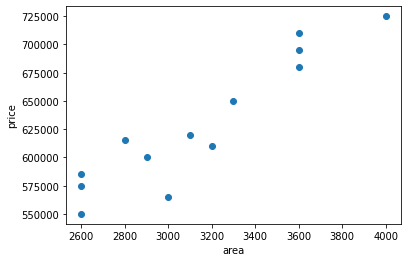

In [ ]:
plt.scatter(df.area,df['price'])
plt.xlabel('area')
plt.ylabel('price')
# plt.show()

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['area','price']])
y_predicted

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,area,price,cluster
0,2600,550000,0
1,3000,565000,0
2,3200,610000,0
3,3600,680000,1
4,4000,725000,1


In [ ]:
km.cluster_centers_


array([[  2850., 590000.],
       [  3620., 692000.]])

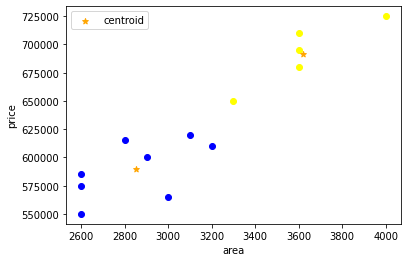

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.area,df1['price'],color='blue')
plt.scatter(df2.area,df2['price'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()

In [ ]:
# Elbow plot

sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['area','price']])
  sse.append(km.inertia_)

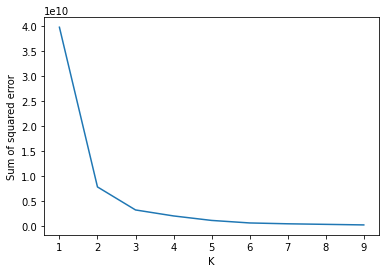

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)